In [12]:
import cymetric as cym
import os
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from cymetric import metadata as data
%matplotlib inline 

In [13]:
# Open the database
db = cym.dbopen("test-input.h5")


In [14]:
# Define an Evaluator, allows to acces the different data tables in the database
myEval = cym.Evaluator(db)

In [15]:
myEval.eval('Metadata')

,SimId,AgentId,Keyword,Type,Value
0,d3884216-51b2-428d-8a4d-4ed8543ebecb,12,WORKLABEL,string,DeployedInst
1,d3884216-51b2-428d-8a4d-4ed8543ebecb,13,WORKLABEL,string,Throughput
2,d3884216-51b2-428d-8a4d-4ed8543ebecb,14,WORKLABEL,string,Throughput
3,d3884216-51b2-428d-8a4d-4ed8543ebecb,15,WORKLABEL,string,Power
4,d3884216-51b2-428d-8a4d-4ed8543ebecb,15,co2,decommission,22.000000
5,d3884216-51b2-428d-8a4d-4ed8543ebecb,15,co2,deployment,35.000000
6,d3884216-51b2-428d-8a4d-4ed8543ebecb,15,co2,timestep,3.000000
7,d3884216-51b2-428d-8a4d-4ed8543ebecb,15,co2,throughput,50.000000
8,d3884216-51b2-428d-8a4d-4ed8543ebecb,15,land,decommission,24.000000
9,d3884216-51b2-428d-8a4d-4ed8543ebecb,15,manpower,decommission,36.000000


In [21]:
metadata = data.get_usage(myEval)
metadata = metadata.drop(columns=['AgentId'])
metadata = metadata.reset_index()
metadata_index = ['SimId', 'Time', 'Keyword']
metadata = metadata.groupby(metadata_index).sum()
metadata = metadata.reset_index()



In [20]:
metadata_co2 = metadata[metadata['Keyword'] == "co2"]
metadata_land = metadata[metadata['Keyword'] == "land"]
metadata_water = metadata[metadata['Keyword'] == "water"]
metadata_man = metadata[metadata['Keyword'] == "manpower"]


<Figure size 432x288 with 0 Axes>

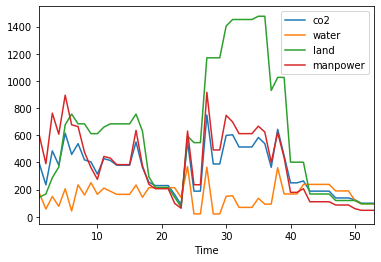

In [18]:
fig = plt.figure()
ax = metadata_co2.plot(x='Time', y='Value', label="co2")
metadata_water.plot(x='Time', y='Value', label="water", ax=ax)
metadata_land.plot(x='Time', y='Value', label="land", ax=ax)
metadata_man.plot(x='Time', y='Value', label="manpower", ax=ax)

plt.show()
fig.savefig("usage.png")
